In [17]:
import numpy as np
import matplotlib.pyplot as plt
from resnet.dataset import NIHDataset
import pickle

## Backbone -RCNN Evaluation

In [18]:
loss_path = "./resnet/losses/"

In [19]:
val_loss = np.load(loss_path + "resnext101_32x8d_val_loss_35.np.npy")
train_loss = np.load(loss_path + "resnext101_32x8d_train_loss_35.np.npy" )
assert len(val_loss) == len(train_loss)

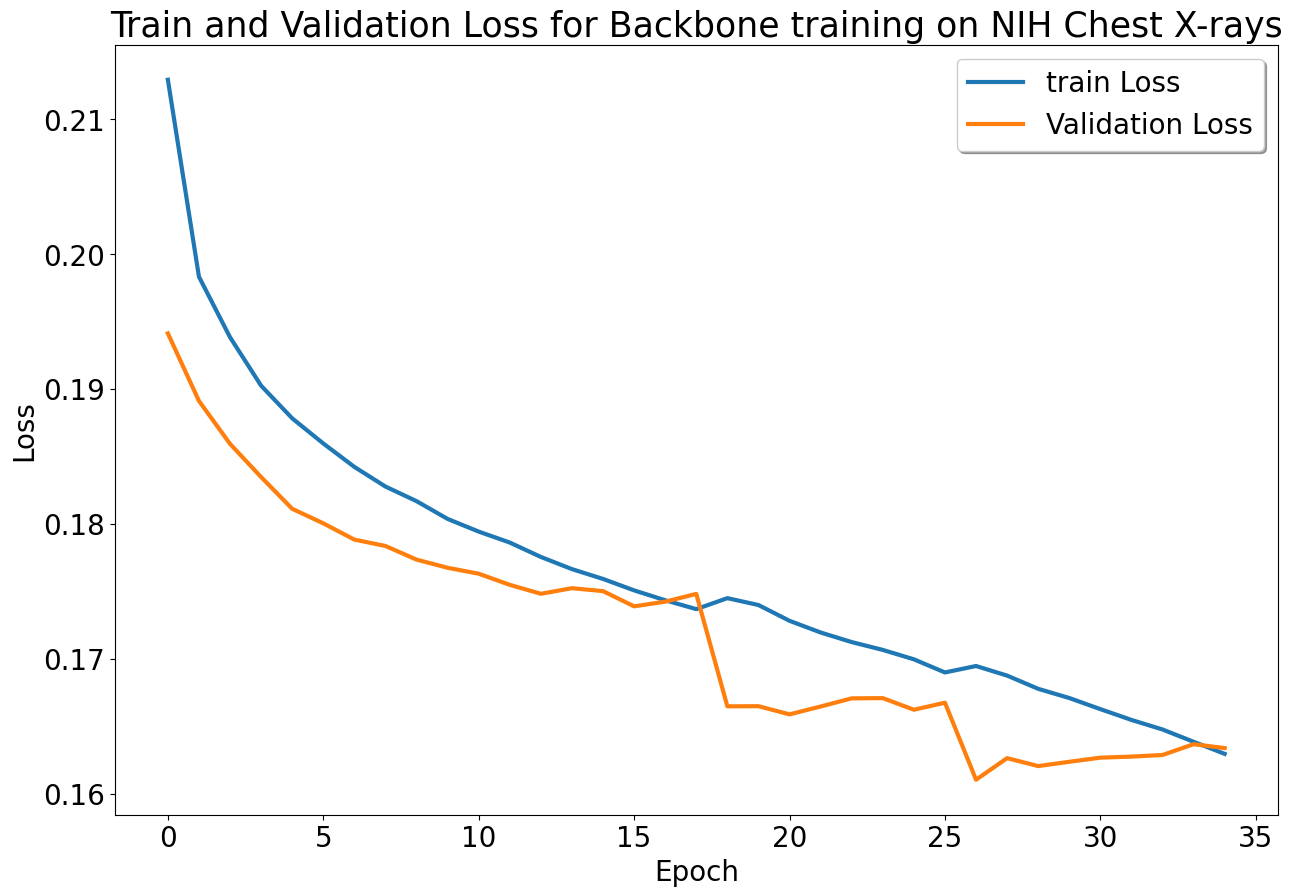

In [20]:
x = [i for i in range(len(val_loss))]

fig = plt.figure(figsize=(15,10))
plt.plot(x,train_loss , label="train Loss", linewidth=3)
plt.plot(x,val_loss, label="Validation Loss", linewidth=3)
plt.title("Train and Validation Loss for Backbone training on NIH Chest X-rays", fontsize=25)
plt.ylabel("Loss",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.legend(shadow=True, prop={'size': 20})
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
plt.show(block=True)
fig.savefig("../imgs/models/loss_backbone_rcnn_35.png",dpi=200)

In [21]:
with open(loss_path + '/resnext101_32x8d_general_test_results_35.pickle', 'rb') as f:
    test_results_general = pickle.load(f)

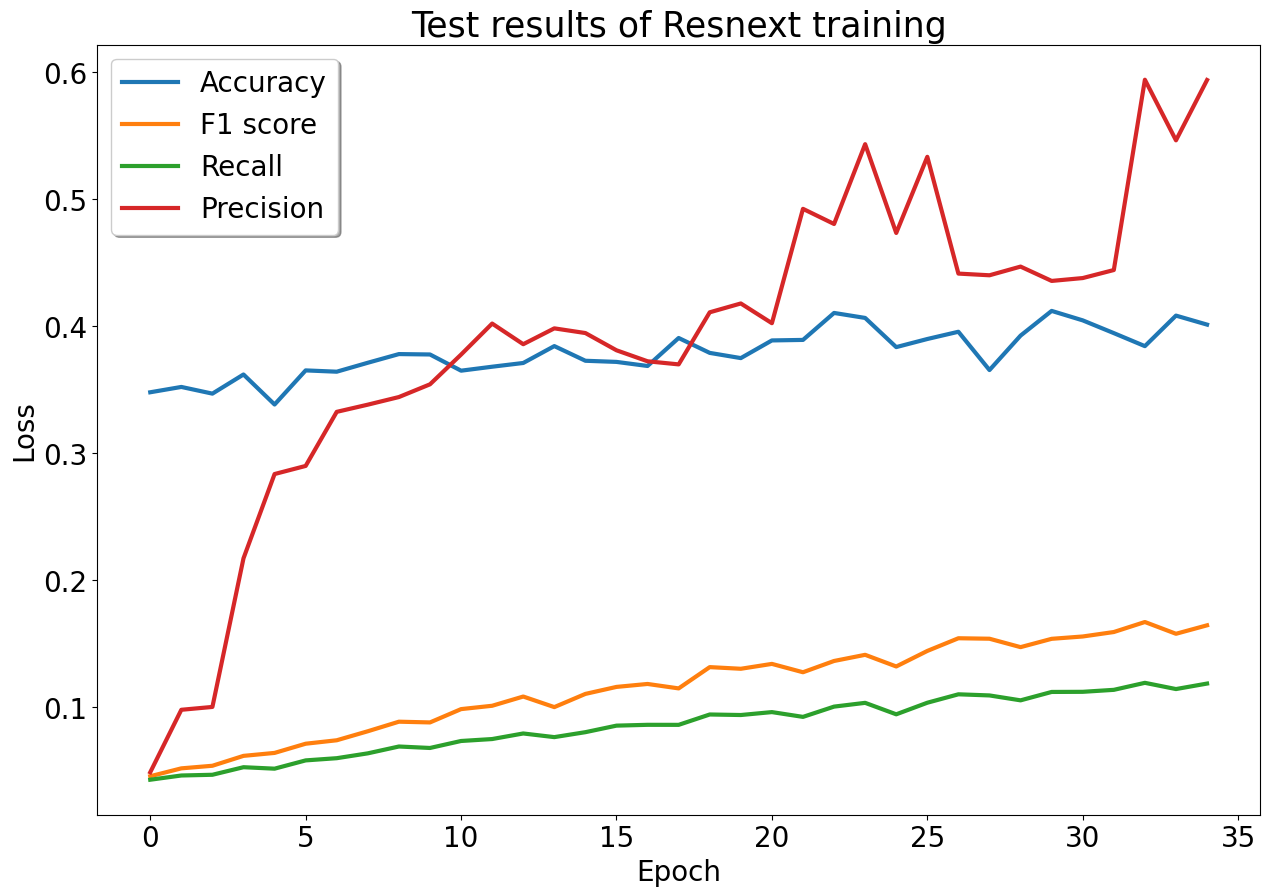

In [24]:
x = [i for i in range(len(val_loss))]

accuracy = [a['accuracy'] for a in test_results_general]
f1 = [a['f1'] for a in test_results_general]
recall = [a['recall'] for a in test_results_general]
precision = [a['precision'] for a in test_results_general]

fig = plt.figure(figsize=(15,10))
plt.plot(x,accuracy, label="Accuracy", linewidth=3)
plt.plot(x,f1, label="F1 score", linewidth=3)
plt.plot(x,recall, label="Recall", linewidth=3)
plt.plot(x,precision, label="Precision", linewidth=3)
plt.title("Test results of Resnext training", fontsize=25)
plt.ylabel("Loss",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.legend(shadow=True, prop={'size': 20})
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
plt.show(block=True)
fig.savefig("../imgs/models/test_results_backbone_rcnn_35.png",dpi=200)

In [23]:
### TODO: use held-out set to validate here testing statistics..
dataset = NIHDataset()

TypeError: expected str, bytes or os.PathLike object, not NoneType